In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
%matplotlib inline
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/heart-disease-prediction-using-logistic-regression/framingham.csv


In [2]:
import warnings

warnings.filterwarnings('ignore')

Logistic regression is statistical model that predicts probability of binary classificaiton, where response varibale is categorical and has only two options, which are coded as 0 and 1. 

Mathematical equation of logistic regression is P = 1 / 1 + e^-(β0 + β1X1 + β2X2 + ... +βpXp). 

Where: 

p is probability of the response variable being in category 0 or 1
X1, X2, ..., Xp are the predictor varibales 
β0, β1, β2 ..., βp are the predictor variables
e is the base of the natural logarithm (Euler's number), approximately equal to 2.71828

Logistic function 1 / 1 + e^-z ensures that predicted probabilities are bounded between 0 and 1

# Import dataset

In [3]:
df_raw = pd.read_csv("/kaggle/input/heart-disease-prediction-using-logistic-regression/framingham.csv")
df_raw.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


# Exploratory Data Analysis

In [4]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [5]:
print(df_raw.shape)
print(list(df_raw.columns))

(4238, 16)
['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD']


Data Preparation

Source
The dataset is publically available on the Kaggle website, and it is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has 10-year risk of future coronary heart disease (CHD).The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes.

Variables
• Sex: male or female(Categorical)
• Age: Age of the patient;(Numerical)
• Current Smoker: whether or not the patient is a current smoker (Categorical)
• Cigs Per Day: the number of cigarettes that the person smoked on average in one day(Numerical) 
• BP Meds: whether or not the patient was on blood pressure medication (Categorical)
• Prevalent Stroke: whether or not the patient had previously had a stroke (Categorical)
• Prevalent Hyp: whether or not the patient was hypertensive (Categorical)
• Diabetes: whether or not the patient had diabetes (Categorical)
• Tot Chol: total cholesterol level (Numerical)
• Sys BP: systolic blood pressure (Numerical)
• Dia BP: diastolic blood pressure (Numerical)
• BMI: Body Mass Index (Numerical)
• Glucose: glucose level (Numerical)
Predict variable (desired target)
• 10 year risk of coronary heart disease CHD (binary: “1”, means “Yes”, “0” means “No”)

In [6]:
df_raw['TenYearCHD'].value_counts()

TenYearCHD
0    3594
1     644
Name: count, dtype: int64

In [7]:
count_no_heart_disease = len(df_raw[df_raw['TenYearCHD']==0])
count_heart_disease = len(df_raw[df_raw['TenYearCHD']==1])
pct_of_no_heart_disease = count_no_heart_disease/(count_no_heart_disease+count_heart_disease)
print("percentage of no heart disease is", pct_of_no_heart_disease*100)
pct_of_heart_disease = count_heart_disease/(count_no_heart_disease+count_heart_disease)
print("percentage of heart disease", pct_of_heart_disease*100)

percentage of no heart disease is 84.80415290231241
percentage of heart disease 15.19584709768759


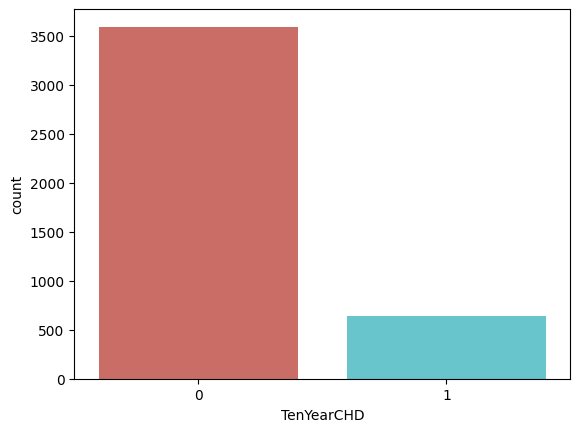

In [8]:
sns.countplot(data=df_raw, x='TenYearCHD', palette='hls')
plt.show()

Our classes are imbalanced, and the ratio of no-heart disease to heart disease instances is 85:15.

# Assessment of numerical columns

<Axes: xlabel='glucose', ylabel='Count'>

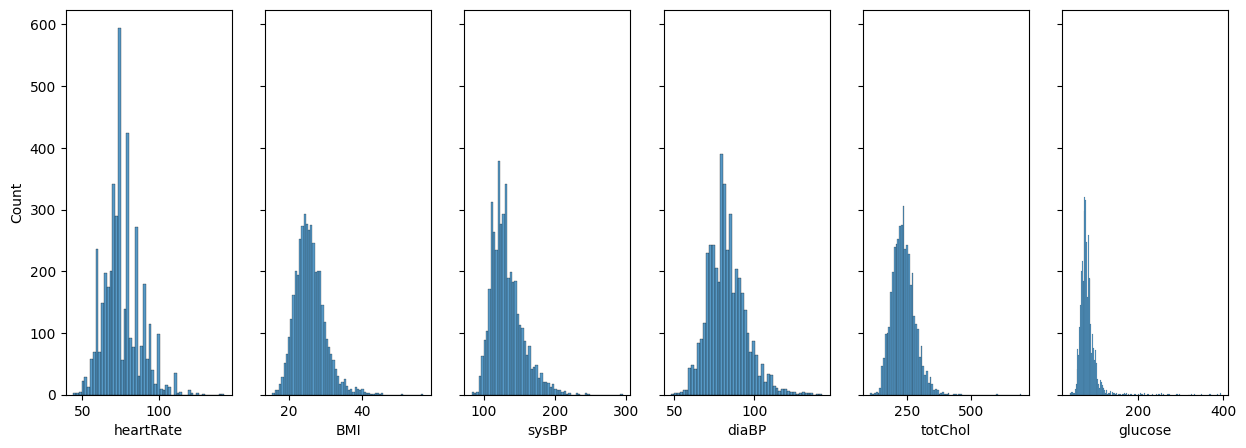

In [9]:
fig, ax = plt.subplots(1, 6, figsize=(15,5), sharey=True)

sns.histplot(ax=ax[0], data=df_raw, x="heartRate")
sns.histplot(ax=ax[1], data=df_raw, x="BMI")
sns.histplot(ax=ax[2], data=df_raw, x="sysBP")
sns.histplot(ax=ax[3], data=df_raw, x="diaBP")
sns.histplot(ax=ax[4], data=df_raw, x="totChol")
sns.histplot(ax=ax[5], data=df_raw, x="glucose")          

 Visualising of some of the key numerical variables, which show range of values impacting on heart disease outcome  
1) Heart rate sits in the range of 60 to 80
2) BMI sits in the range of 20 to 30
3) SysBP sits in the range of 100 to 180
4) DiaBP sits in the range of 60 to 100
5) TotChol sits in the range of 180 to 300
6) Glucose sits in the range of 50 to 180

# Assessment of categorical columns

<Axes: xlabel='TenYearCHD', ylabel='glucose'>

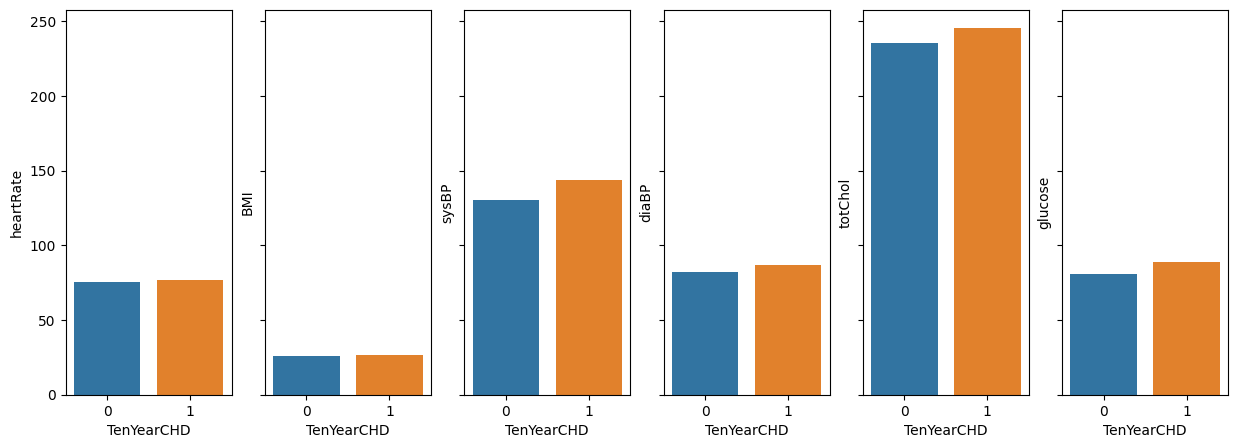

In [10]:
fig, ax = plt.subplots(1, 6, figsize=(15,5), sharey=True)

sns.barplot(data=df_raw, ax=ax[0], y="heartRate", x="TenYearCHD", ci=None)
sns.barplot(data=df_raw, ax=ax[1], y="BMI", x="TenYearCHD", ci=None)
sns.barplot(data=df_raw, ax=ax[2], y="sysBP", x="TenYearCHD", ci=None)
sns.barplot(data=df_raw, ax=ax[3], y="diaBP", x="TenYearCHD", ci=None)
sns.barplot(data=df_raw, ax=ax[4], y="totChol", x="TenYearCHD", ci=None)
sns.barplot(data=df_raw, ax=ax[5], y="glucose", x="TenYearCHD", ci=None)

Assessment of categorical columns shows that most of the variables similarly impact on heart disease probability. The column TenYearCHD is the target column to predict whether heart disease is probable and intent of above deep dive into categorical features was to understand to which extent each of them will impact on prediction outcome.

# Detecting and removing missing valuses

In [11]:
print(df_raw.isna().sum())

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64


In [12]:
# Imputing Missing Values
from sklearn.base import TransformerMixin
class DataFrameImputer(TransformerMixin):

    def __init__(self):
        """Columns of dtype object are imputed with the most frequent value in column. 
        Columns of other types are imputed with mean of column."""
    def fit(self, X, y=None):
        self.fill = pd.Series([X[c].value_counts().index[0]
            if X[c].dtype == np.dtype('O') else X[c].mean() for c in 
            X],index=X.columns)
        return self
    def transform(self, X, y=None):
        return X.fillna(self.fill)
X = pd.DataFrame(df_raw) 
df_raw = DataFrameImputer().fit_transform(X)
df_raw.isna().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [13]:
X = df_raw.loc[:, df_raw.columns != 'TenYearCHD']
y = df_raw.loc[:, df_raw.columns == 'TenYearCHD']

In [14]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.397495
         Iterations 6
                         Results: Logit
Model:              Logit            Method:           MLE       
Dependent Variable: TenYearCHD       Pseudo R-squared: 0.067     
Date:               2024-08-22 22:34 AIC:              3399.1675 
No. Observations:   4238             BIC:              3494.4452 
Df Model:           14               Log-Likelihood:   -1684.6   
Df Residuals:       4223             LL-Null:          -1805.8   
Converged:          1.0000           LLR p-value:      1.0783e-43
No. Iterations:     6.0000           Scale:            1.0000    
-----------------------------------------------------------------
                   Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------
male               0.3753   0.0970  3.8676 0.0001  0.1851  0.5655
age                0.0285   0.0055  5.2220 0.0000  0.0178  0.0392


In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [16]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.85


In [17]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      1074
           1       0.80      0.02      0.04       198

    accuracy                           0.85      1272
   macro avg       0.82      0.51      0.48      1272
weighted avg       0.84      0.85      0.78      1272



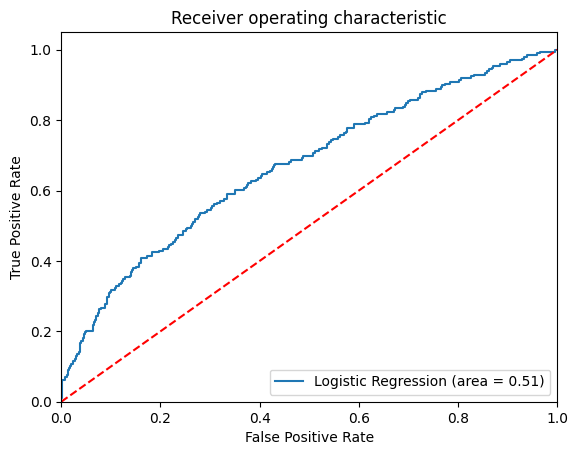

In [18]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# Implementing Logistic Regression with handling outliers and balancing the data

# Handling outliers

<Axes: ylabel='glucose'>

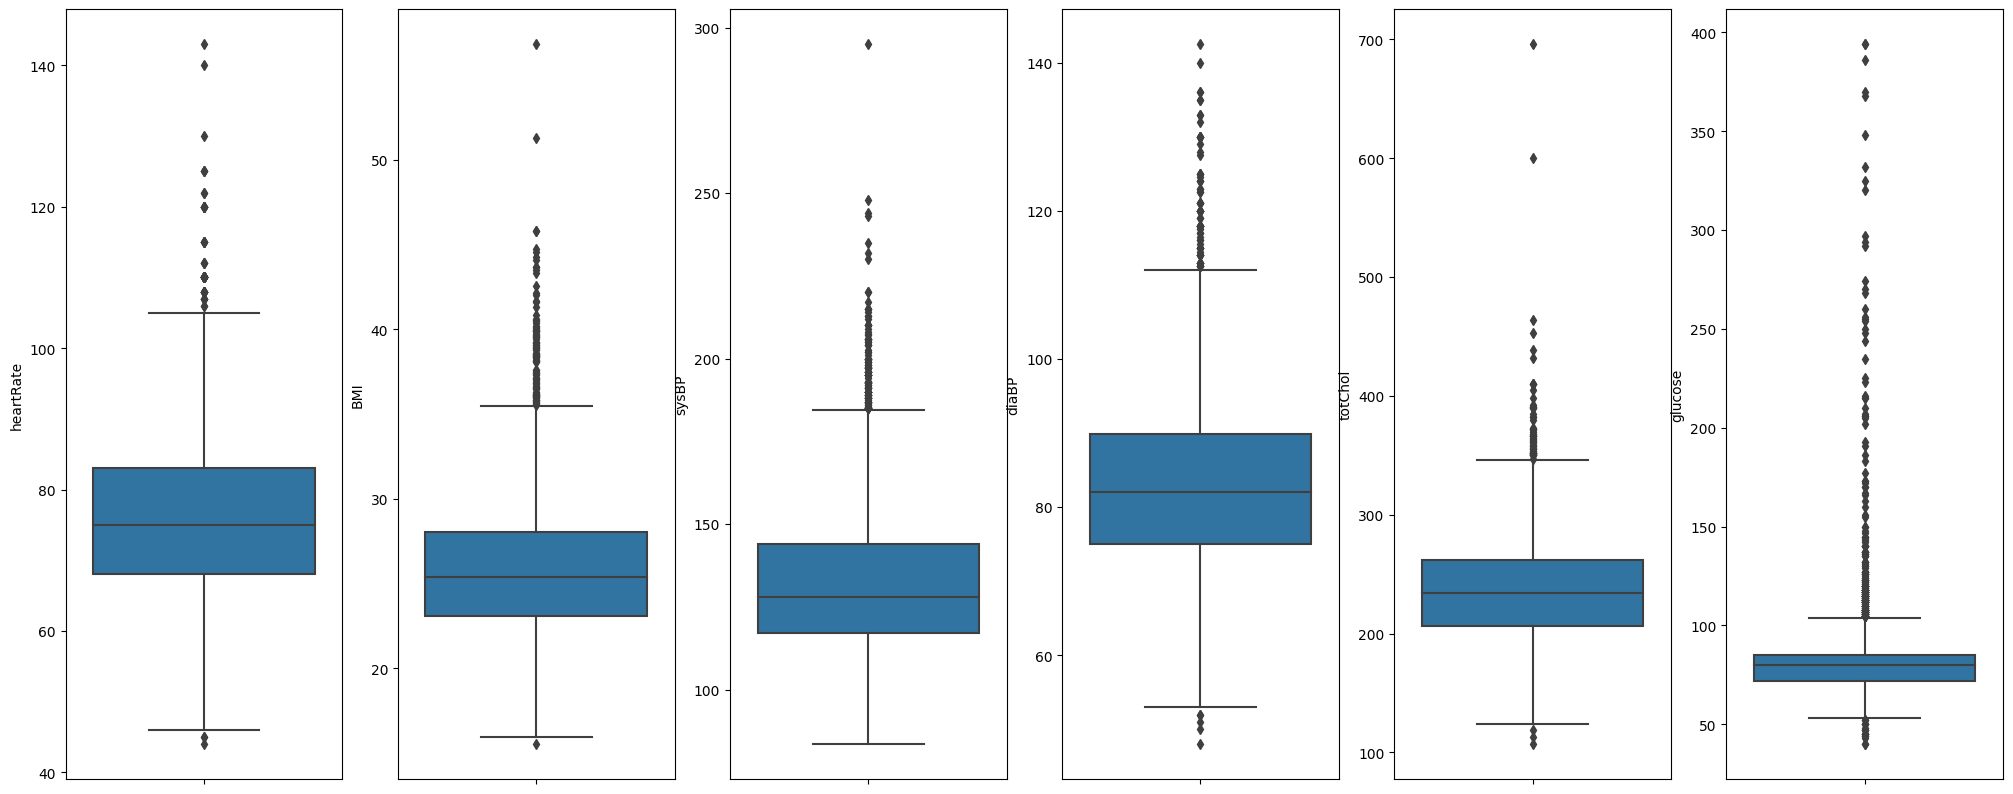

In [19]:
fig, ax = plt.subplots(1, 6, figsize=(25,10))
sns.boxplot(data=df_raw, ax=ax[0], y="heartRate")
sns.boxplot(data=df_raw, ax=ax[1], y="BMI")
sns.boxplot(data=df_raw, ax=ax[2], y="sysBP")
sns.boxplot(data=df_raw, ax=ax[3], y="diaBP")
sns.boxplot(data=df_raw, ax=ax[4], y="totChol")
sns.boxplot(data=df_raw, ax=ax[5], y="glucose")

Above boxplots show that outliers predominantly sit in the range of 3rd quartile as such removing of the outliers was achieved by targeting third quartile values, which were derived from describe method of each of the variable: df[col].describe()

In [20]:
df_new=df_raw[(df_raw.heartRate<=83)
              &(df_raw.BMI<=27)
              &(df_raw.glucose<=85)
              &(df_raw.glucose>=72)
              &(df_raw.sysBP<=143)
              &(df_raw.diaBP<=89)
              &(df_raw.totChol<=262)]

<Axes: ylabel='glucose'>

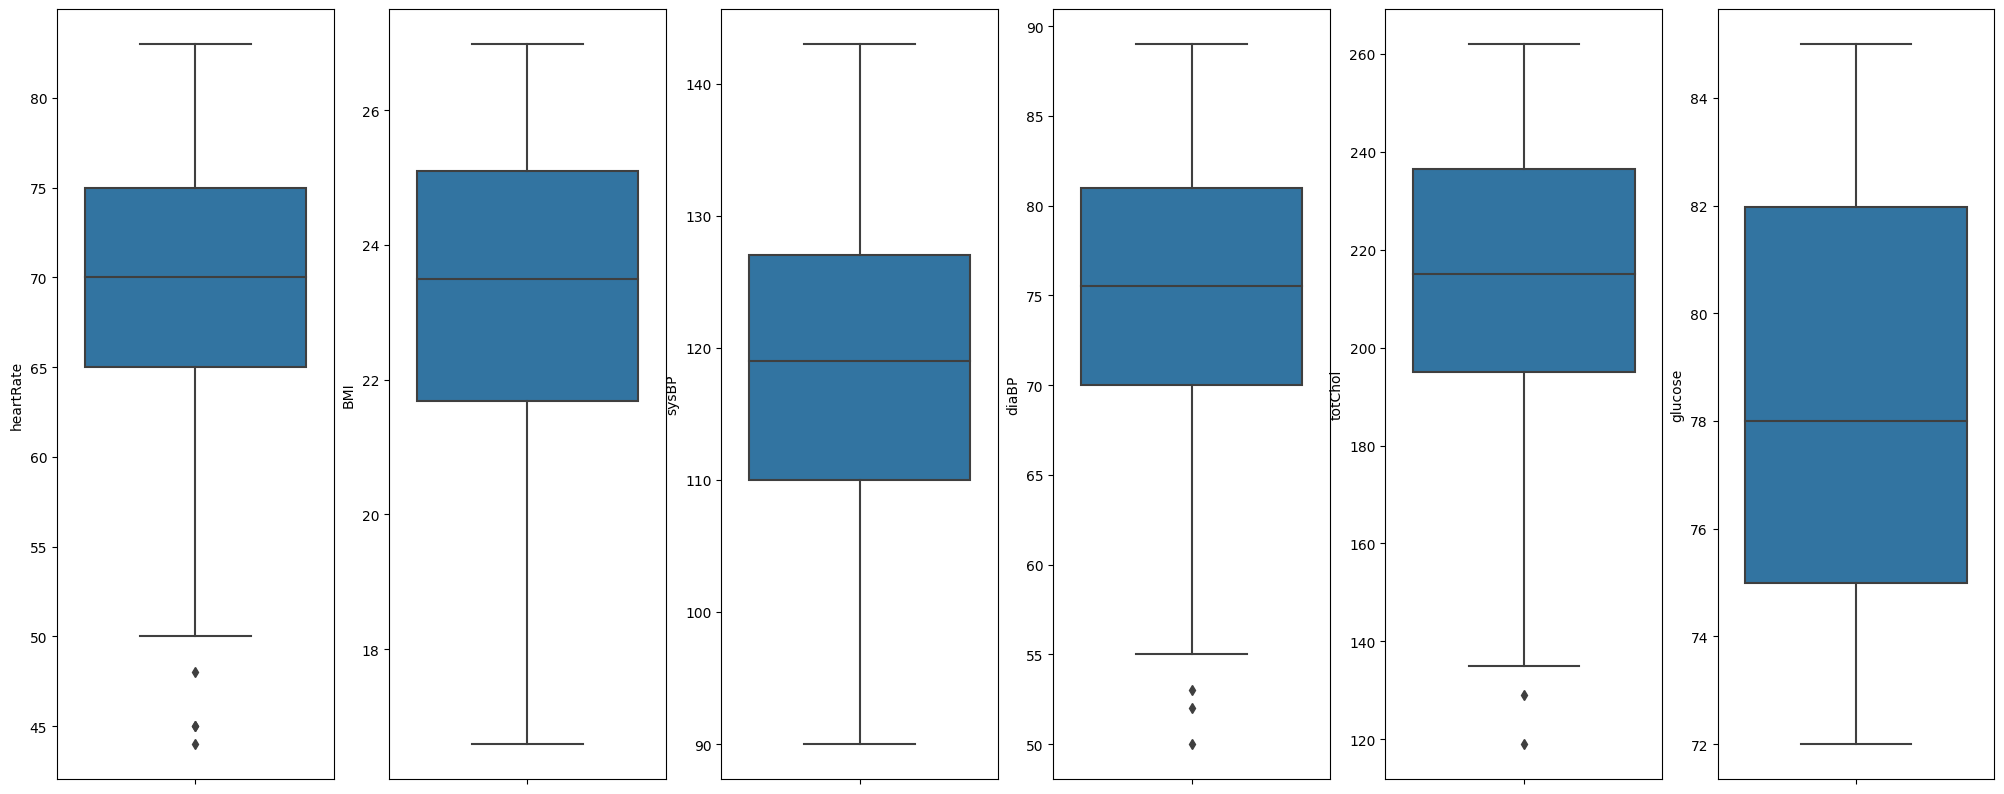

In [21]:
fig, ax = plt.subplots(1, 6, figsize=(25,10))
sns.boxplot(data=df_new, ax=ax[0], y="heartRate")
sns.boxplot(data=df_new, ax=ax[1], y="BMI")
sns.boxplot(data=df_new, ax=ax[2], y="sysBP")
sns.boxplot(data=df_new, ax=ax[3], y="diaBP")
sns.boxplot(data=df_new, ax=ax[4], y="totChol")
sns.boxplot(data=df_new, ax=ax[5], y="glucose")

In [22]:
X = df_new.loc[:, df_new.columns != 'TenYearCHD']
y = df_new.loc[:, df_new.columns == 'TenYearCHD']

from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns
os_data_X,os_data_y=os.fit_resample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['TenYearCHD'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of no heart disease in oversampled data",len(os_data_y[os_data_y['TenYearCHD']==0]))
print("Number of heart disease",len(os_data_y[os_data_y['TenYearCHD']==1]))
print("Proportion of no heart disease data in oversampled data is ",len(os_data_y[os_data_y['TenYearCHD']==0])/len(os_data_X))
print("Proportion of heart disease data in oversampled data is ",len(os_data_y[os_data_y['TenYearCHD']==1])/len(os_data_X))

length of oversampled data is  992
Number of no heart disease in oversampled data 496
Number of heart disease 496
Proportion of no heart disease data in oversampled data is  0.5
Proportion of heart disease data in oversampled data is  0.5


Data in the dataframe is now fully balanced. It is important to notice that only the training data were over-sampled, because by oversampling only on the training data, none of the information in the test data is being used to create synthetic observations, therefore, no information will move from test data into the model training.

In [23]:
X1 = os_data_X.loc[:, os_data_X.columns != 'TenYearCHD']
y1 = os_data_y.loc[:, os_data_y.columns == 'TenYearCHD']

import statsmodels.api as sm
logit_model=sm.Logit(y1,X1)
result=logit_model.fit()
print(result.summary2())

         Current function value: 0.569504
         Iterations: 35
                             Results: Logit
Model:                  Logit              Method:             MLE       
Dependent Variable:     TenYearCHD         Pseudo R-squared:   0.178     
Date:                   2024-08-22 22:34   AIC:                1159.8959 
No. Observations:       992                BIC:                1233.3918 
Df Model:               14                 Log-Likelihood:     -564.95   
Df Residuals:           977                LL-Null:            -687.60   
Converged:              0.0000             LLR p-value:        2.6815e-44
No. Iterations:         35.0000            Scale:              1.0000    
-------------------------------------------------------------------------
                 Coef.    Std.Err.     z    P>|z|     [0.025     0.975]  
-------------------------------------------------------------------------
male              0.0278     0.1672  0.1662 0.8680     -0.2999     0.3554
ag

/opt/conda/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [24]:
X1.drop(['male', 'prevalentStroke', 'diabetes'], axis=1)

,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentHyp,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,38,2.000000,0,0.000000,0.0,0,220.000000,122.000000,80.500000,21.660000,73.000000,77.000000
1,52,4.000000,1,20.000000,0.0,0,254.000000,114.000000,80.000000,16.590000,75.000000,74.000000
2,40,2.000000,1,10.000000,0.0,0,169.000000,123.500000,77.500000,23.090000,71.000000,81.966753
3,58,1.000000,0,0.000000,0.0,0,233.000000,125.500000,84.000000,26.050000,67.000000,76.000000
4,55,2.000000,0,0.000000,0.0,0,175.000000,107.500000,65.000000,20.170000,68.000000,79.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
987,52,2.799972,0,0.000000,0.0,0,218.700098,124.049866,79.249895,24.646956,71.699958,81.966753
988,40,2.000000,0,5.300794,0.0,0,206.855278,103.180476,60.927639,25.642452,65.300794,73.060159
989,51,1.000000,1,15.330747,0.0,0,219.933851,125.000000,81.272356,23.907505,61.124541,73.132299
990,41,1.934395,1,20.000000,0.0,0,212.852863,111.868790,64.582480,25.023523,79.015927,76.065605


In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.3, random_state=0)
logreg1 = LogisticRegression()
logreg1.fit(X_train1, y_train1)

y_pred1 = logreg1.predict(X_test1)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg1.score(X_test1, y_test1)))

Accuracy of logistic regression classifier on test set: 0.68


In [26]:
from sklearn.metrics import classification_report
print(classification_report(y_test1, y_pred1))

              precision    recall  f1-score   support

           0       0.68      0.67      0.68       147
           1       0.69      0.70      0.69       151

    accuracy                           0.68       298
   macro avg       0.68      0.68      0.68       298
weighted avg       0.68      0.68      0.68       298



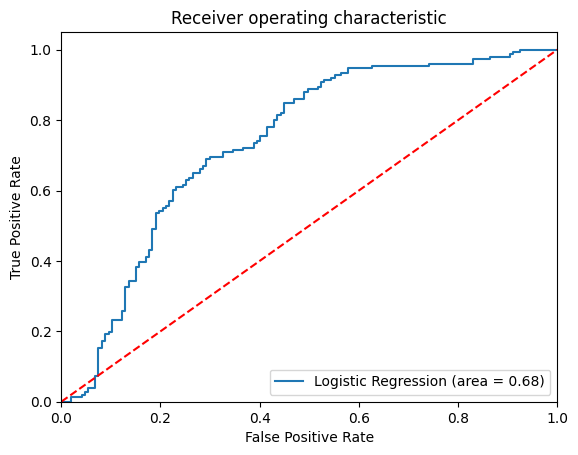

In [27]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit1_roc_auc = roc_auc_score(y_test1, logreg1.predict(X_test1))
fpr, tpr, thresholds = roc_curve(y_test1, logreg1.predict_proba(X_test1)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit1_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# Decision Tree Classifier

In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize and train the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train1, y_train1)

# Make predictions on the test data
y_pred_clf = clf.predict(X_test1)

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test1, y_pred_clf)}")
print(f"Classification Report:\n {classification_report(y_test1, y_pred_clf)}")
print(f"Confusion Matrix:\n {confusion_matrix(y_test1, y_pred_clf)}")

Accuracy: 0.8926174496644296
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.88      0.89       147
           1       0.88      0.91      0.90       151

    accuracy                           0.89       298
   macro avg       0.89      0.89      0.89       298
weighted avg       0.89      0.89      0.89       298

Confusion Matrix:
 [[129  18]
 [ 14 137]]


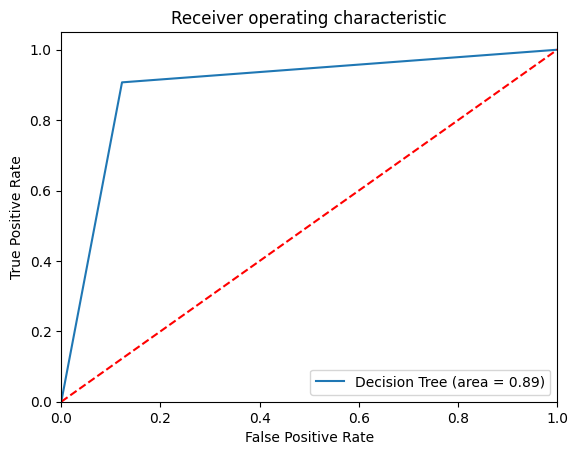

In [29]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
clf_roc_auc = roc_auc_score(y_test1, clf.predict(X_test1))
fpr, tpr, thresholds = roc_curve(y_test1, clf.predict_proba(X_test1)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Decision Tree (area = %0.2f)' % clf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

# XGBoost Classifier

In [30]:
from xgboost import XGBClassifier

# Initialize and train the XGBoost Classifier
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb.fit(X_train1, y_train1)

# Make predictions on the test data
y_pred_xgb = xgb.predict(X_test1)

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test1, y_pred_xgb)}")
print(f"Classification Report:\n {classification_report(y_test1, y_pred_xgb)}")
print(f"Confusion Matrix:\n {confusion_matrix(y_test1, y_pred_xgb)}")

Accuracy: 0.9395973154362416
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.95      0.94       147
           1       0.95      0.93      0.94       151

    accuracy                           0.94       298
   macro avg       0.94      0.94      0.94       298
weighted avg       0.94      0.94      0.94       298

Confusion Matrix:
 [[140   7]
 [ 11 140]]


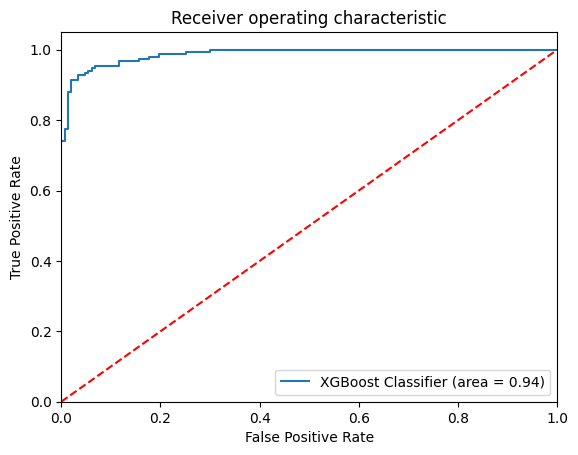

In [31]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
xgb_roc_auc = roc_auc_score(y_test1, xgb.predict(X_test1))
fpr, tpr, thresholds = roc_curve(y_test1, xgb.predict_proba(X_test1)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='XGBoost Classifier (area = %0.2f)' % xgb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

# Random Forest Classifier

In [32]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train model
rfclf = RandomForestClassifier(random_state=42)
rfclf.fit(X_train1, y_train1)

# Make predictions
y_pred_rfclf = rfclf.predict(X_test1)

# Evaluate model
print(f"Accuracy: {accuracy_score(y_test1, y_pred_rfclf)}")
print(f"Classification Report:\n {classification_report(y_test1, y_pred_rfclf)}")
print(f"Confusion Matrix:\n {confusion_matrix(y_test1, y_pred_rfclf)}")

Accuracy: 0.9731543624161074
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97       147
           1       0.97      0.97      0.97       151

    accuracy                           0.97       298
   macro avg       0.97      0.97      0.97       298
weighted avg       0.97      0.97      0.97       298

Confusion Matrix:
 [[143   4]
 [  4 147]]


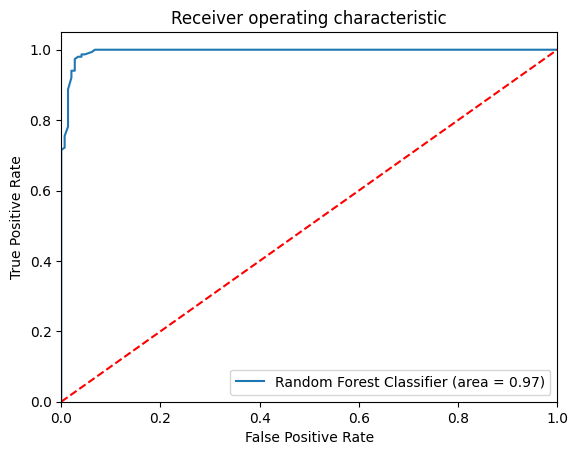

In [33]:
rfclf_roc_auc = roc_auc_score(y_test1, rfclf.predict(X_test1))
fpr, tpr, thresholds = roc_curve(y_test1, rfclf.predict_proba(X_test1)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest Classifier (area = %0.2f)' % rfclf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

# Gradient Boosting Classifier

In [34]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize and train model
gbclf = GradientBoostingClassifier(random_state=42)
gbclf.fit(X_train1, y_train1)

# Make predictions
y_pred_gbclf = gbclf.predict(X_test1)

# Evaluate model
print(f"Accuracy: {accuracy_score(y_test1, y_pred_gbclf)}")
print(f"Classification Report:\n {classification_report(y_test1, y_pred_gbclf)}")
print(f"Confusion Matrix:\n {confusion_matrix(y_test1, y_pred_gbclf)}")

Accuracy: 0.9228187919463087
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.93      0.92       147
           1       0.93      0.92      0.92       151

    accuracy                           0.92       298
   macro avg       0.92      0.92      0.92       298
weighted avg       0.92      0.92      0.92       298

Confusion Matrix:
 [[136  11]
 [ 12 139]]


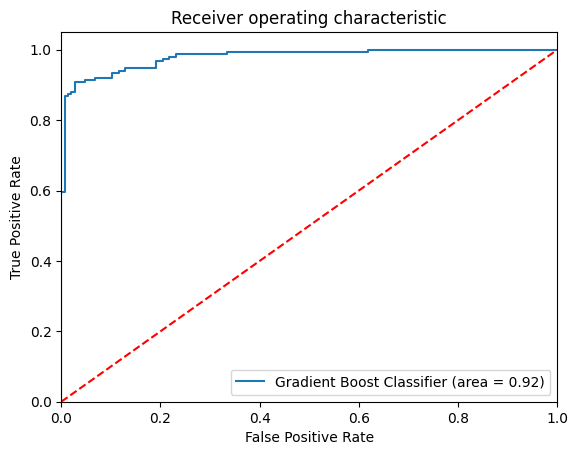

In [35]:
gbclf_roc_auc = roc_auc_score(y_test1, gbclf.predict(X_test1))
fpr, tpr, thresholds = roc_curve(y_test1, gbclf.predict_proba(X_test1)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Gradient Boost Classifier (area = %0.2f)' % gbclf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

                Model  Accuracy
0  LogisticRegression  0.684564
1        DecisionTree  0.892617
2             XGBoost  0.939597
3        RandomForest  0.973154
4       GradientBoost  0.922819


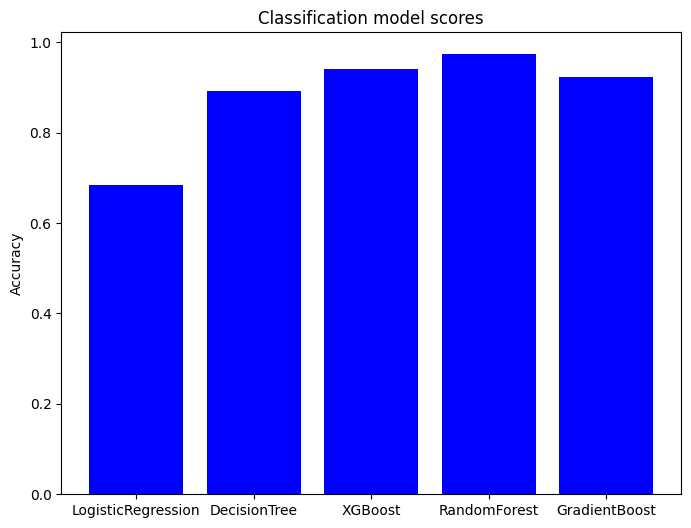

In [36]:
LogReg = logreg1.score(X_test1, y_test1)
Dec_clf = accuracy_score(y_test1, y_pred_clf)
Xgb_clf = accuracy_score(y_test1, y_pred_xgb)
RF_clf = accuracy_score(y_test1, y_pred_rfclf)
GB_clf = accuracy_score(y_test1, y_pred_gbclf)

data = {"Model" : ["LogisticRegression", "DecisionTree", "XGBoost", "RandomForest", "GradientBoost"],
       "Accuracy" : [LogReg, Dec_clf, Xgb_clf, RF_clf, GB_clf]
       }

scores = pd.DataFrame(data)
print(scores)

# Plot bar chart
plt.figure(figsize=(8, 6))
plt.bar(scores['Model'], scores['Accuracy'], color='blue')

#plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Classification model scores')

plt.show()